<a href="https://colab.research.google.com/github/MayureshOP-max/DataAnalytics/blob/main/lab%20exam%20DA_8027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ***Q1-1***

In [46]:
#1. import data , print15 rows, no missing data and gender is not U
df = pd.read_csv('Dog_Bites_Data.csv')

df_selected = df[['DateOfBite', 'Age', 'Gender', 'SpayNeuter', 'ZipCode']].dropna()

df_filtered = df_selected[df_selected['Gender'] != 'U']

print(df_filtered.head())

         DateOfBite Age Gender  SpayNeuter ZipCode
3   January 08 2018   4      M       False   11231
5   January 03 2018  4Y      M       False   11231
8   January 04 2018  5Y      M       False   11235
9   January 10 2018  3Y      F       False   11208
11  January 07 2018   7      M        True   11208


# ***Q1-2***

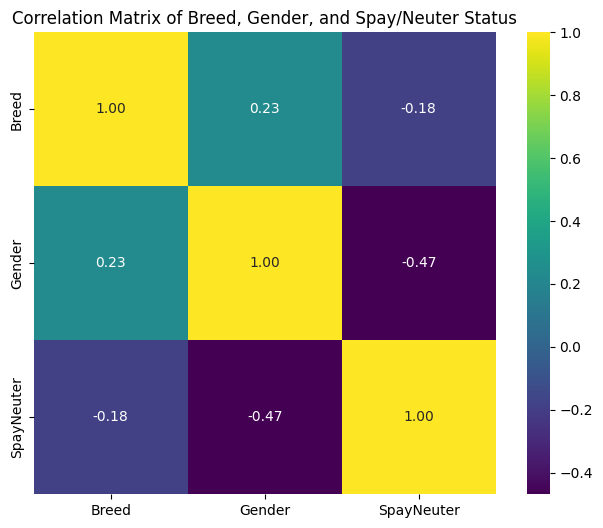

In [47]:
#2. Remove Missing data
df_cleaned = df.dropna(subset=['Breed', 'Gender', 'SpayNeuter'])
df_encoded = df_cleaned.copy()

# Draw a colorful plot to depict correlation between Breed, Gender, SpayNeuter
df_encoded['Breed'] = df_encoded['Breed'].astype('category').cat.codes
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['SpayNeuter'] = df_encoded['SpayNeuter'].astype(bool).astype(int)
correlation_matrix = df_encoded[['Breed', 'Gender', 'SpayNeuter']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.title('Correlation Matrix of Breed, Gender, and Spay/Neuter Status')
plt.show()


# ***Q1-3***

<ipython-input-48-f04e78ca2272>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')


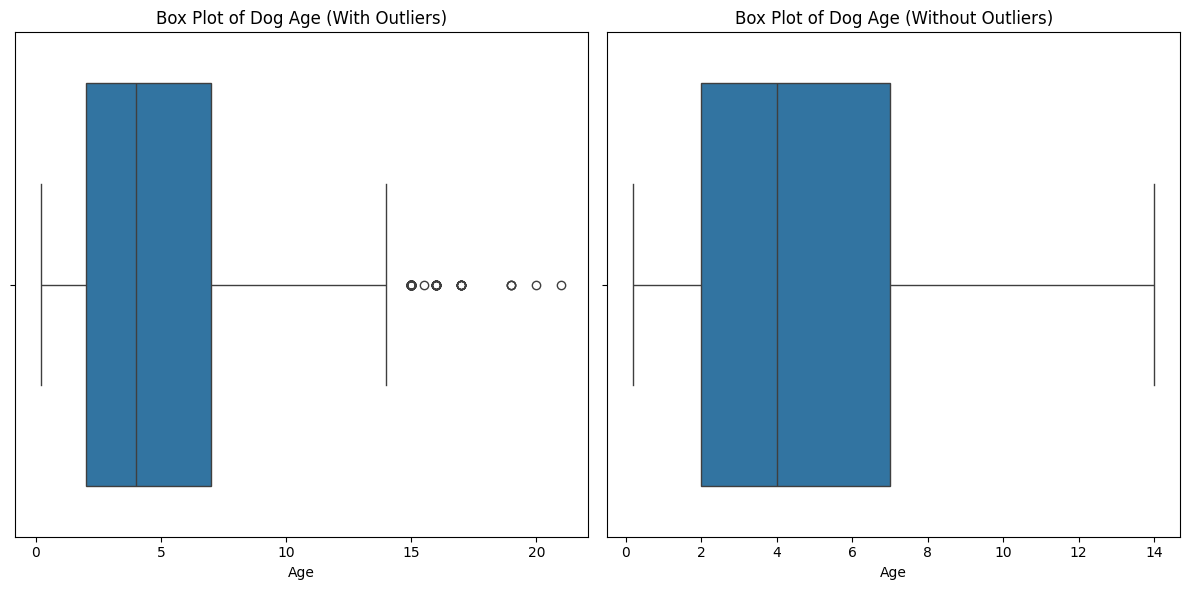

In [48]:
# remove missing data in age column and perform data cleaning, perform an outlier detection on age and create a boxplot for the same

df_cleaned = df_cleaned.dropna(subset=['Age'])

df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Age'])


Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df_cleaned[(df_cleaned['Age'] >= lower_bound) & (df_cleaned['Age'] <= upper_bound)]


# Box plot with outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['Age'])
plt.title('Box Plot of Dog Age (With Outliers)')
plt.xlabel('Age')

# Box plot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['Age'])
plt.title('Box Plot of Dog Age (Without Outliers)')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# ***Q2-1***

In [49]:
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')
titanic_data
missing_data_columns = titanic_data.columns[titanic_data.isnull().any()].tolist()
print("Columns with missing data:", missing_data_columns)
print(titanic_data['Age'].head())


Columns with missing data: ['Age', 'Cabin', 'Embarked']
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [50]:
mean_age_by_pclass = titanic_data.groupby('Pclass')['Age'].mean()
print(mean_age_by_pclass)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [51]:
titanic_data['Age'] = titanic_data.apply(
    lambda row: mean_age_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# Checking if missing values in 'Age' column are filled
print("Updated 'Age' column with missing values filled based on Pclass mean:")
print(titanic_data['Age'])


Updated 'Age' column with missing values filled based on Pclass mean:
0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64


# ***Q2-2***

In [52]:
#perform a Chi-square test among the passenger class( Dataset column pclass) and survival (dataset column survived) . commnet on the interference of the result

contingency_table = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])

# Chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

# Interpretation of the results
if p < 0.05:
  print("The results are statistically significant.")
  print("There is a relationship between passenger class and survival.")
else:
  print("The results are not statistically significant.")
  print("There is no relationship between passenger class and survival.")

Chi-square statistic: 102.88898875696056
P-value: 4.549251711298793e-23
The results are statistically significant.
There is a relationship between passenger class and survival.


# ***Q2-3***

In [53]:
# Calculate mean, median, mode, quartile ranges, standard deviation for age for "Male" passengers

male_passengers = titanic_data[titanic_data['Sex'] == 'male']

age_male = male_passengers['Age']
mean_age = age_male.mean()
median_age = age_male.median()
mode_age = age_male.mode()[0] if not age_male.mode().empty else None
q1_age = age_male.quantile(0.25)
q3_age = age_male.quantile(0.75)
std_dev_age = age_male.std()

print(f"Mean age for male passengers: {mean_age}")
print(f"Median age for male passengers: {median_age}")
print(f"Mode age for male passengers: {mode_age}")
print(f"Q1 age for male passengers: {q1_age}")
print(f"Q3 age for male passengers: {q3_age}")
print(f"Standard deviation of age for male passengers: {std_dev_age}")

Mean age for male passengers: 30.076584371067373
Median age for male passengers: 27.0
Mode age for male passengers: 25.14061971830986
Q1 age for male passengers: 23.0
Q3 age for male passengers: 37.0
Standard deviation of age for male passengers: 13.259064430735277
